## Support Vector Machines

**Q1** Which is a good seperating line?

![](../images/svm1.png)

**Q2** Which is a good seperating line?

![](../images/svm2.png)

What's different in the solution for the Q2. 


The margin between the line and the nearest points is maximum.  We are looking for maximum margin we can get from the nearest points. 

So need to find 2 things?

1. Which will be nearest points?
2. The line with maximum margin from the points


### Support Vectors 


*  Support vectors are the data points that lie closest to the decision surface (or hyperplane)
*  They are the data points most difficult to classify
*  They have direct bearing on the optimum location of the decision surface

### Maximal-Margin Classifier

Try to get the maximum margin between the closest points. 
This is done using simple Linear Algebra of inner product of the vectors 

```
B0 + (B1 * X1) + (B2 * X2) = 0
```

Where the coefficients (B1 and B2) that determine the slope of the line and the intercept (B0) are found by the learning algorithm, and X1 and X2 are the two input variables.

You can make classifications using this line. By plugging in input values into the line equation, you can calculate whether a new point is above or below the line.

* Above the line, the equation returns a value greater than 0 and the point belongs to the first class (class 0).
* Below the line, the equation returns a value less than 0 and the point belongs to the second class (class 1).
* A value close to the line returns a value close to zero and the point may be difficult to classify.
* If the magnitude of the value is large, the model may have more confidence in the prediction.

The distance between the line and the closest data points is referred to as the margin. The best or optimal line that can separate the two classes is the line that as the largest margin. This is called the Maximal-Margin hyperplane.

The margin is calculated as the perpendicular distance from the line to only the closest points. Only these points are relevant in defining the line and in the construction of the classifier. These points are called the support vectors. They support or define the hyperplane.

In [5]:
## Let's see some code 

from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn import svm

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                    iris.target, test_size=0.3,random_state=24)

clf = svm.SVC()

clf.fit(X_train,y_train)
preds = clf.predict(X_test)
clf.score(X_test, y_test)


0.97777777777777775

In [6]:
(preds == y_test).sum()

44

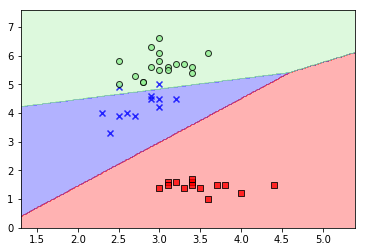

In [27]:
## Plotting the decision boundary
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,1:3],
                                    iris.target, test_size=0.3,random_state=24)

clf = svm.LinearSVC(random_state=42)

clf.fit(X_train,y_train)
preds = clf.predict(X_test)
clf.score(X_test, y_test)        
        
plot_decision_regions(X_test,y_test, clf)


### Kernel Trick

![](../images/svm_kernel.png)

How to do it ?

####  Data Transformation

* Create a new feature which will make things easier for us. 

* z = x^2 + y^2

Let's see it again 

~![](../images/svm_linear.png)


So do we need to do it and create our own transformation by looking at data?

#Answer 

#### Kernel Trick 

Use different kernels which can do the data transformation for us and work great. 

#### Types of Kernel

1. **Linear** : 
```
K(x, xi) = sum(x * xi)
```

2. **Polynomial** : 
```
K(x,xi) = 1 + sum(x * xi)^d
```

3. **Radial** : 
```
K(x,xi) = exp(-gamma * sum((x – xi)^2))
```

0.955555555556


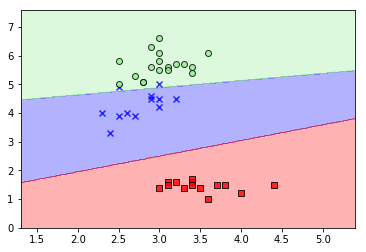

In [44]:
## Let's code some 
clf = svm.SVC(kernel="linear", random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)



0.955555555556


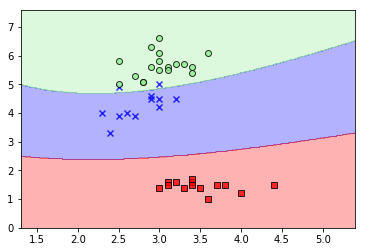

In [31]:
## Let's code some 
clf = svm.SVC(kernel="poly", random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)




0.955555555556


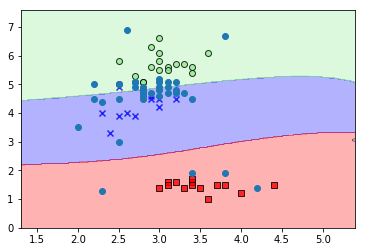

In [56]:
## Let's code some 
clf = svm.SVC(kernel="rbf", random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)

plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1])

plt.show()

In [57]:
#why line is not showing the vectors?

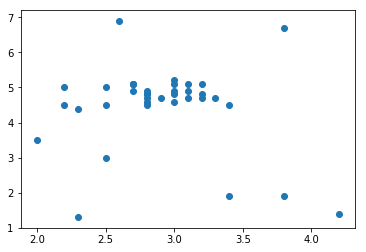

In [55]:
## how to get the support vectors
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1])
clf.support_vectors_
plt.show()

### Parameter tuning

Basically there are 2 parameters which we tune

1. **C** : C is the parameter for the soft margin cost function, which controls the influence of each individual support vector; this process involves trading error penalty for stability

If C is large missclassification is penalized. If low we can live with that. 

2. **GAMMA** : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’

**If gamma is low the boundary will look smoother. **

**If gamma is high the boundary will look curvier.**

0.955555555556


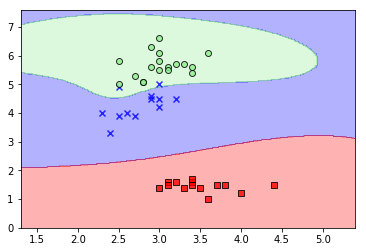

In [58]:
#Let's play again 
## Let's code some 
clf = svm.SVC(kernel="rbf",C=1000, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)



0.933333333333


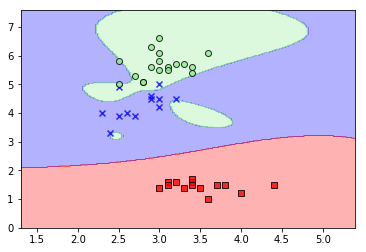

In [59]:
#Let's play again 
## Let's code some 
clf = svm.SVC(kernel="rbf",C=1e6, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)




0.466666666667


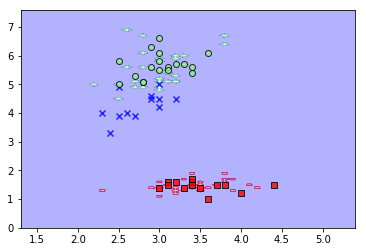

In [60]:
clf = svm.SVC(kernel="rbf",gamma = 1e3, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)



0.955555555556


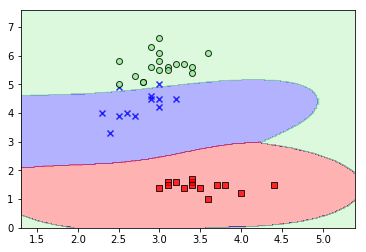

In [61]:
clf = svm.SVC(kernel="rbf",gamma = 1, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)




0.933333333333


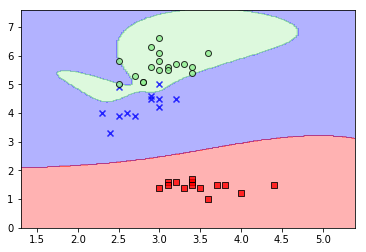

In [36]:
#Let's play again 
## Let's code some 
clf = svm.SVC(kernel="rbf",C=1e9, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)




0.977777777778


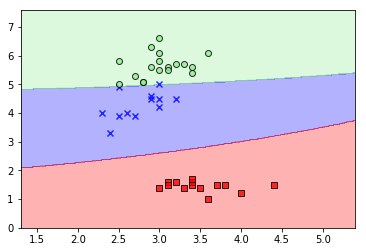

In [37]:
#Let's play again 
## Let's code some 
clf = svm.SVC(kernel="rbf",gamma=0.1, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)




0.911111111111


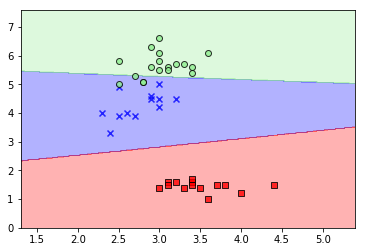

In [38]:
#Let's play again 
## Let's code some 
clf = svm.SVC(kernel="rbf",gamma=1e-2, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)




0.977777777778


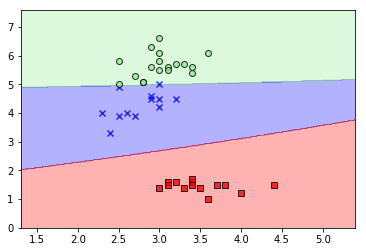

In [43]:
#Let's play again 
## Let's code some 
clf = svm.SVC(kernel="rbf",gamma=0.05, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)





0.977777777778


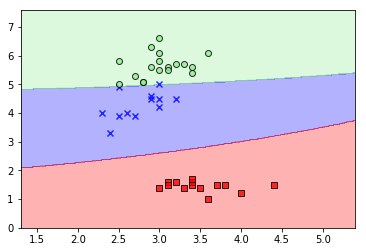

In [62]:
#Let's play again 
## Let's code some 
clf = svm.SVC(kernel="rbf",gamma=0.1, random_state=24)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(clf.score(X_test, y_test)        )
        
plot_decision_regions(X_test,y_test, clf)






## Assignment 

1. What is the difference between LinearSVC and SVC(kernel="linear")?
2. Work on kidney dataset and get the best accuracy using SVM by tuning 
   **C**, **gamma** and **kernel**
3. Read the references below in completion

### References

1. https://www.youtube.com/watch?v=_PwhiWxHK8o - Video Lecture with Mathematical Proof
2. http://scikit-learn.org/stable/modules/svm.html - sklearn documentation
3. https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/svmtutorial.pdf - Another great tutorial from Microsoft 
4. http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf - SVM notes for general public
